# Task (Differential geometry of surfaces in $\mathbb{R}^3$)

Given the function $r:\mathbb{R}^2\to\mathbb{R}^3$, $(u,v)\mapsto r(u,v)$, which is twice continuously differentiable and parametrizes a surface embedded in $\mathbb{R}^3$, provided that $r'_u\times r'_v$ is nowhere zero.

The first fundamental forms of the surface (in Riemannian geometry, the metric tensor) are given by:
$$ 
g(u,v) = \left[ 
\begin{array}{cc}
E & F \\
F & G
\end{array}
\right],
$$
where $E=\langle r'_u, r'_u\rangle$, $F=\langle r'_u, r'_v\rangle$, and $G=\langle r'_v, r'_v\rangle$.

Similarly, the second fundamental forms of the surface can be obtained using second-order derivatives:
$$ 
K(u,v) = \left[ 
\begin{array}{cc}
L & M \\
M & N
\end{array}
\right],
$$
where $L=\langle r''_{uu}, n\rangle$, $M=\langle r''_{uv}, n\rangle$, and $N=\langle r''_{vv}, n\rangle$, and $n$ is the unit normal vector to the surface given by
$$
n = \frac{r'_u\times r'_v}{\lVert r'_u\times r'_v\rVert}.
$$

The Gauss curvature (product curvature) of the surface is given by
$$
\kappa = \frac{\mathrm{det}K}{\mathrm{det}g}=\frac{LN-M^2}{EG-F^2}.
$$

**Part 1 of the problem:** Write a program that takes as input the parametrization $(u,v)\mapsto r(u,v)$ and outputs the Gauss curvature $(u,v)\mapsto \kappa(u,v)\in\mathbb{R}$.

**Part 2 of the problem:** Using the program for computing the Gauss curvature, compute the Gauss curvature of the surface parametrized by $(u,v)\mapsto [u,v,f(u,v)]^\top$ for some explicit function $f(u,v)$, and plot the function $(u,v)\mapsto f(u,v)$ with colors based on the value of the Gauss curvature.


**Solution to Part 1 of the problem:**

In [9]:
import autograd.numpy as np
from autograd import grad
from autograd import jacobian

def curvature(r, u, v):
    ru = jacobian(r, 0)
    rv = jacobian(r,1)
    
    E = np.dot(ru(u,v),ru(u,v))
    F = np.dot(ru(u,v),rv(u,v))
    G = np.dot(rv(u,v),rv(u,v))
     
    ruu = jacobian(ru,0)
    ruv = jacobian(ru,1)
    rvv = jacobian(rv,1)
    n   = np.cross(ru(u,v),rv(u,v))/np.linalg.norm(np.cross(ru(u,v),rv(u,v)))
    
    L = np.dot(ruu(u,v),n)
    M = np.dot(ruv(u,v),n)
    N = np.dot(rvv(u,v),n)
    
    
    k = (L*N-M**2)/(E*G-F**2)
    return k

r  = lambda u, v: np.array([np.cos(u),np.sin(u), v]) #CYLINDER
r1 = lambda u, v: np.array([np.sin(u)*np.cos(v),np.sin(u)*np.sin(v), np.cos(u)])

print(curvature(r, 1.9, 8.0))


-0.0


**Solution to Part 2 of the problem:**

Let's compute Gaussian curvature for some popular parametrizations and plot them using colors adjusted according to their Gaussian curvature values.
Before we start, I need to create a code in order to normalize values of Gaussian curvature arrays.

In [155]:
def normalize(K):
    all_zeros = np.all(K == 0)
    if all_zeros:
        norm_K = np.full_like(K, 0.5)
    else:
        max_val = np.nanmax(np.abs(K))
        norm_K = 0.5 + 0.5 * (K / max_val)
    return norm_K

C:\Users\nural\AppData\Local\Temp\ipykernel_33268\2568233297.py:22: RuntimeWarning: invalid value encountered in true_divide
  n   = np.cross(ru(u,v),rv(u,v))/np.linalg.norm(np.cross(ru(u,v),rv(u,v)))


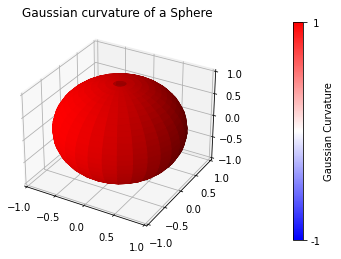

In [197]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import colors
from matplotlib.cm import ScalarMappable

#sphere 
r1 = lambda u, v: np.array([np.sin(u)*np.cos(v),np.sin(u)*np.sin(v), np.cos(u)])


n = 30
u1 = np.linspace(0, np.pi, n)
v1 = np.linspace(0, 2*np.pi, n)
U, V = np.meshgrid(u1, v1)
K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[j,i] = curvature(r1, u1[i], v1[j])
K = normalize(K)

X = r1(U,V)[0]
Y = r1(U,V)[1]
Z = r1(U,V)[2]


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

m = cm.ScalarMappable(cmap=cm.bwr)


im = ax.plot_surface(X, Y, Z, facecolors = cm.bwr(K))
cbar = fig.colorbar(m, ticks = [-1,0,1], label= "Gaussian Curvature", pad = 0.2)
cbar.ax.set_yticklabels(['-1','-1', ' 1'])

plt.title("Gaussian curvature of a Sphere")
plt.show()

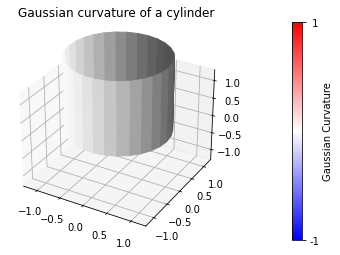

In [202]:
#cylinder
r2 = lambda u, v: np.array([np.cos(u),np.sin(u), v]) #CYLINDER

n = 30
u2 = np.linspace(0, 2*np.pi, n)
v2 = np.linspace(0, 2, n)
U2, V2 = np.meshgrid(u2, v2)
K2 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K2[i,j] = curvature(r2, u2[i], v2[j])
K2 = normalize(K2)
        
X2 = r2(U2,V2)[0]
Y2 = r2(U2,V2)[1]
Z2 = r2(U2,V2)[2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-1.25, 1.25)
ax.set_ylim3d(-1.25, 1.25)
ax.set_zlim3d(-1.25, 1.25)

im = ax.plot_surface(X2, Y2, Z2, facecolors = cm.bwr(K2))
cbar = fig.colorbar(m, ticks = [-1,0,1], label= "Gaussian Curvature", pad = 0.2)
cbar.ax.set_yticklabels(['-1','-1', ' 1'])

plt.title("Gaussian curvature of a cylinder")
plt.show()

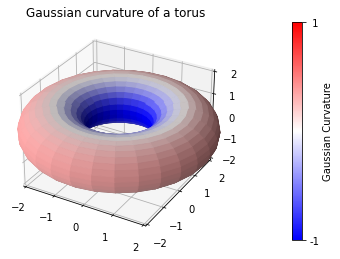

In [201]:
#torus
r3 = lambda u, v: np.array([(2+np.cos(v))*np.cos(u),(2+np.cos(v))*np.sin(u), np.sin(v)]) #Torus

n = 30
u3 = np.linspace(0, 2*np.pi, n)
v3 = np.linspace(0, 2*np.pi, n)
U3, V3 = np.meshgrid(u3, v3)
K3 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K3[j,i] = curvature(r3, u3[i], v3[j])
    
X3 = r3(U3,V3)[0]
Y3 = r3(U3,V3)[1]
Z3 = r3(U3,V3)[2]
K3 = normalize(K3)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

im = ax.plot_surface(X3, Y3, Z3, facecolors = cm.bwr(K3), norm = colors.LogNorm())
cbar = fig.colorbar(m, ticks = [-1,0,1], label= "Gaussian Curvature", pad = 0.2)
cbar.ax.set_yticklabels(['-1','-1', ' 1'])
plt.title("Gaussian curvature of a torus")
plt.show()

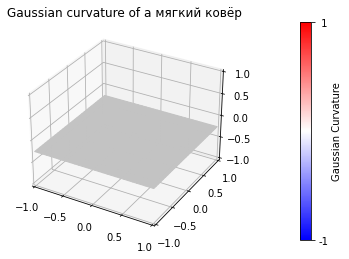

In [203]:
#plane
r4 = lambda u, v: np.array([u,v,u-u-0.25]) #plane

n = 30
u4 = np.linspace(-1, 1, n)
v4 = np.linspace(-1, 1, n)
U4, V4 = np.meshgrid(u4, v4)
K4 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K4[j,i] = curvature(r4, u4[i], v4[j])
K4 = normalize(K4)
    
X4 = r4(U4,V4)[0]
Y4 = r4(U4,V4)[1]
Z4 = r4(U4,V4)[2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

im = ax.plot_surface(X4, Y4, Z4, facecolors = cm.bwr(K4), norm=colors.TwoSlopeNorm(vcenter = 0.0, vmin = -1.0, vmax = 1.0))
cbar = fig.colorbar(m, ticks = [-1,0,1], label= "Gaussian Curvature", pad = 0.2)
cbar.ax.set_yticklabels(['-1','-1', ' 1'])

plt.title("Gaussian curvature of a мягкий ковёр")
plt.show()

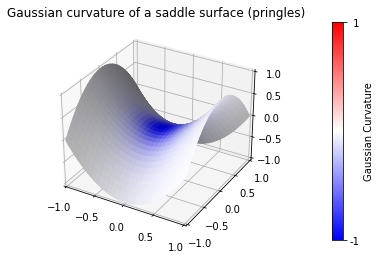

In [206]:
#hyperboloid

r5 = lambda u, v: np.array([u,v,u**2-v**2]) #plane

n = 30
u5 = np.linspace(-1, 1, n)
v5 = np.linspace(-1, 1, n)
U5, V5 = np.meshgrid(u5, v5)
K5 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K5[j,i] = curvature(r5, u5[i], v5[j])

K5 = normalize(K5)
    
X5 = r5(U5,V5)[0]
Y5 = r5(U5,V5)[1]
Z5 = r5(U5,V5)[2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

im = ax.plot_surface(X5, Y5, Z5, facecolors = cm.bwr(K5))
cbar = fig.colorbar(m, ticks = [-1,0,1], label= "Gaussian Curvature", pad = 0.2)
cbar.ax.set_yticklabels(['-1','-1', ' 1'])

plt.title("Gaussian curvature of a saddle surface (pringles)")
plt.show()